<a href="https://colab.research.google.com/github/MateusSanfer/Telecom-X-Parte-2-Prevendo-Churn/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [93]:
import pandas as pd

## Carregando dados tratados

In [94]:
url_dados_tratados = 'https://raw.githubusercontent.com/MateusSanfer/Challenge-Telecom-X-One/refs/heads/main/dados_tratados.csv'

try:
  dados_tratados = pd.read_csv(url_dados_tratados)
  print('Dados carregados com sucesso!')
except Exception as e:
  print(f'Erro ao carregar os dados: {e}')

dados_tratados.head()

Dados carregados com sucesso!


,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [95]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 

In [96]:
dados_tratados.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [97]:
dados_tratados.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'contas_diarias'],
      dtype='object')

## Remoção de Colunas Irrelevantes

In [98]:
# Removendo a coluna de identificação
dados_tratados = dados_tratados.drop(columns=['customer_id'], axis=1)
# dados_tratados = dados_tratados.drop(columns=['customer_id', 'contas_diarias'], axis=1)
dados_tratados

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Female,0,0,0,13,1,No,DSL,Yes,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7028,1,Male,0,1,0,22,1,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7029,0,Male,0,0,0,2,1,No,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7030,0,Male,0,1,1,67,1,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


## Encoding de Variáveis Categóricas


Para preparar os dados para algoritmos de machine learning que geralmente requerem entradas numéricas, aplicamos a técnica de **One-Hot Encoding** às variáveis categóricas. Este método cria novas colunas binárias para cada categoria única dentro de uma variável categórica, onde um valor de '1' indica a presença da categoria e '0' a ausência.

Utilizamos a função `make_column_transformer` e a classe `OneHotEncoder` da biblioteca `sklearn.preprocessing` para realizar esta transformação de forma eficiente. As colunas categóricas selecionadas para o encoding incluem:

- gender
- multiple_lines
- internet_service
- online_security
- online_backup
- device_protection
- tech_support
- streaming_tv
- streaming_movies
- contract
- payment_method

O `handle_unknown='ignore'` foi configurado no `OneHotEncoder` para lidar com possíveis valores desconhecidos durante a transformação, evitando erros. As colunas não especificadas para o encoding foram mantidas no dataframe resultante utilizando `remainder='passthrough'`. O resultado dessa transformação é armazenado em um novo DataFrame chamado `dados_encoded`, pronto para ser usado em modelos de machine learning.

In [99]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [100]:
colunas_categoricas = [
    'gender', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract', 'payment_method'
]

In [101]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_encoded = one_hot_enc.fit_transform(dados_tratados)
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot_enc.get_feature_names_out())
dados_encoded

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__multiple_lines_No,onehotencoder__multiple_lines_Yes,onehotencoder__internet_service_DSL,onehotencoder__internet_service_Fiber optic,onehotencoder__internet_service_No,onehotencoder__online_security_No,onehotencoder__online_security_Yes,onehotencoder__online_backup_No,...,remainder__churn,remainder__senior_citizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__phone_service,remainder__paperless_billing,remainder__monthly_charges,remainder__total_charges,remainder__contas_diarias
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.186667
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,1.996667
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.463333
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.266667
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.838333
7028,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.836667
7029,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.676667
7030,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.261667


## Verificação da Proporção de Evasão

### Calcular a distribuição percentual da coluna 'churn'.

Calcular a proporção de cada classe (sim e não) na coluna 'churn' para entender o desbalanceamento.

In [102]:
# Distribuição absoluta
dados_tratados['churn'].value_counts()

,count
churn,
0,5163
1,1869


In [103]:
# Distribuição percentual
dados_tratados['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


/tmp/ipython-input-104-348269110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=dados_tratados, palette='Set2')


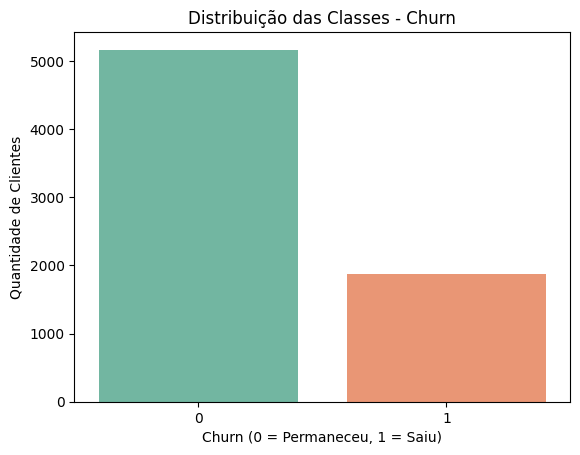

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=dados_tratados, palette='Set2')
plt.title('Distribuição das Classes - Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

### Principais Conclusões da Análise de Dados

* Aproximadamente 73,42% dos clientes permaneceram ativos, enquanto cerca de 26,58% cancelaram o contrato.
* Há um desequilíbrio de classe significativo na variável de cancelamento, sendo a classe majoritária os clientes que permaneceram ativos.

* O desbalanceamento de classes pode impactar negativamente o desempenho de modelos de machine learning tradicionais, pois eles tendem a ser otimizados para a acurácia geral e podem ter dificuldade em prever corretamente a classe minoritária (churn). Isso pode levar a modelos que subestimam a evasão de clientes, o que é crítico para negócios que buscam identificar e reter clientes em risco.

### Próximos Passos

* O desequilíbrio de classe identificado precisa ser corrigido durante a fase de construção do modelo, utilizando técnicas como reamostragem ( SMOTE) ou algoritmos que lidam com dados desbalanceados para garantir uma previsão precisa da rotatividade de clientes.
* O próximo passo envolve a aplicação de técnicas apropriadas para lidar com esse desequilíbrio de classe antes do treinamento dos modelos de aprendizado de máquina.

## Balanceamento de Classes

In [105]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [106]:
X = dados_encoded.drop(columns=['remainder__churn'])
y = dados_tratados['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando novas proporções
print("Antes do SMOTE:")
print(y_train.value_counts(normalize=True))

print("\nDepois do SMOTE:")
print(y_res.value_counts(normalize=True))

Antes do SMOTE:
churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Depois do SMOTE:
churn
1    0.5
0    0.5
Name: proportion, dtype: float64


## Padronizando os dados (normalização z-score)

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

## Treinando o modelo escolhido `LogisticRegression` utilizando os dados de treino balanceados

In [108]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_res_scaled, y_res)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

  Permaneceu       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110


Pontuação AUC: 0.8443


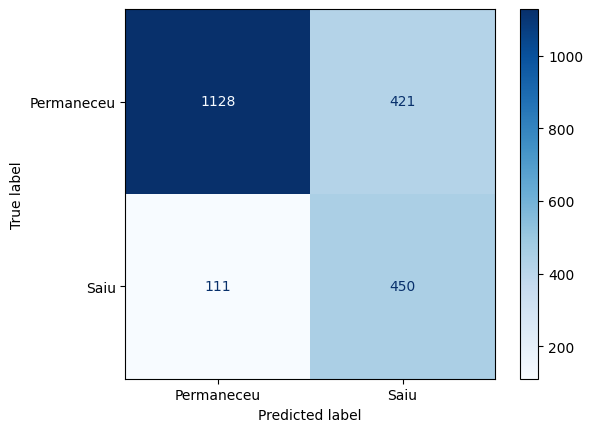

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo_lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=['Permaneceu', 'Saiu']))
auc_lr = roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC: {auc_lr:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

# Treinado com RandomForest
Treine um modelo de classificação nos dados de treino balanceados (`X_res`, `y_res`), faça previsões no conjunto de teste original (`X_test`) e avalie o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes.

## Escolha e importação do modelo

Selecionar um modelo de classificação adequado para o problema (por exemplo, Regressão Logística, Random Forest, ou Gradient Boosting) e importar a classe correspondente do scikit-learn.


**Raciocínio**:
Importe a classe `RandomForestClassifier` de `sklearn.ensemble` conforme solicitado pela subtarefa.

In [110]:
from sklearn.ensemble import RandomForestClassifier

## Treinamento do modelo

Treinar o modelo de classificação escolhido (`RandomForestClassifier`) utilizando os dados de treino balanceados (`X_res`, `y_res`).


In [111]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

## Previsão no conjunto de teste

Fazer previsões no conjunto de teste original (`X_test`) para avaliar o desempenho do modelo em dados não vistos.


In [112]:
y_pred_rf = modelo_rf.predict(X_test)

## Avaliação do modelo

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes, como precisão, recall, F1-score e a Curva ROC/AUC.


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110


Pontuação AUC: 0.8158


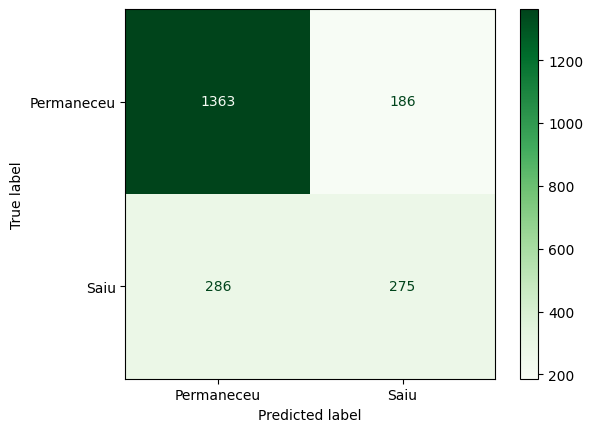

In [113]:
from sklearn.metrics import classification_report, roc_auc_score

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
print(f"\nPontuação AUC: {auc_rf:.4f}")

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Greens')

## Treinando o modelo com KNN

Relatório de Classificação (KNN):
              precision    recall  f1-score   support

  Permaneceu       0.87      0.68      0.77      1549
        Saiu       0.45      0.72      0.55       561

    accuracy                           0.69      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.69      0.71      2110


Matriz de Confusão (KNN):

Pontuação AUC (KNN): 0.7545


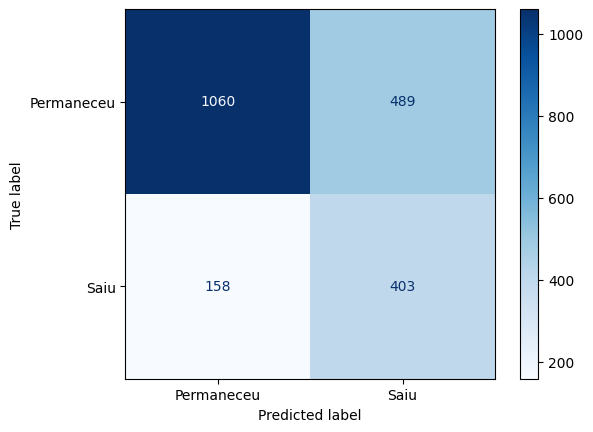

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Criando e treinando o modelo KNN
# Podemos ajustar o número de vizinhos (n_neighbors) para otimizar o desempenho.
# Vamos começar com um valor padrão, por exemplo, 5.
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_res_scaled, y_res)

# Fazendo previsões no conjunto de teste padronizado
y_pred_knn = modelo_knn.predict(X_test_scaled)

# Avaliando o desempenho do modelo
print("Relatório de Classificação (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=['Permaneceu', 'Saiu']))

# Exibindo a matriz de confusão
print("\nMatriz de Confusão (KNN):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

# Calculando e exibindo a pontuação AUC
auc_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC (KNN): {auc_knn:.4f}")

## Resumo dos Modelos Treinados

### Q&A

**P: Qual foi o desempenho dos modelos de classificação treinados nos dados balanceados ao serem avaliados no conjunto de teste original?**

**R:** Treinamos e avaliamos três modelos de classificação nos dados balanceados com SMOTE: Regressão Logística, Random Forest e KNN.

*   **Regressão Logística:**
    *   Demonstrou o melhor poder de discriminação, alcançando uma pontuação AUC de **0.8443**.
    *   O relatório de classificação revelou alto recall para a classe 'Saiu' (0.80), o que indica uma boa capacidade de identificar clientes que provavelmente cancelarão.
    *   A precisão para a classe 'Saiu' foi de 0.52, resultando em um número considerável de falsos positivos.
    *   O F1-score para a classe 'Saiu' foi de 0.63.

*   **Random Forest:**
    *   Obteve uma pontuação AUC de **0.8158**.
    *   Apresentou uma precisão maior para a classe 'Saiu' (0.60) em comparação com a Regressão Logística.
    *   O recall para a classe 'Saiu' foi menor (0.49), indicando que identificou menos clientes que de fato cancelaram.
    *   O F1-score para a classe 'Saiu' foi de 0.54.

*   **KNN:**
    *   Alcançou uma pontuação AUC de **0.7545**.
    *   Demonstrou um recall razoável para a classe 'Saiu' (0.72), mas com a menor precisão entre os três modelos (0.45).
    *   O F1-score para a classe 'Saiu' foi de 0.55.

### Principais descobertas da análise de modelos

*   A **Regressão Logística** se destacou com a maior pontuação AUC, indicando sua superioridade em distinguir entre clientes que cancelam e os que não cancelam.
*   O balanceamento dos dados de treino com SMOTE foi crucial para melhorar a capacidade dos modelos em identificar a classe minoritária (churn). A Regressão Logística, em particular, demonstrou um recall notavelmente alto para a classe 'Saiu' (0.80).
*   Todos os modelos apresentaram um desafio comum: uma precisão menor para a classe 'Saiu' em comparação com o recall. Isso implica que, embora sejam razoavelmente bons em identificar clientes em risco de churn, eles também classificam incorretamente um número significativo de clientes que não cancelariam como churn.

### Insights ou Próximos Passos

*   Com a Regressão Logística apresentando o melhor desempenho geral (maior AUC e F1-score para a classe de churn), ela seria uma candidata forte para implantação, dependendo dos objetivos de negócio.
*   Apesar do bom desempenho da Regressão Logística, a baixa precisão para a classe de churn ainda é um ponto de atenção. Ajustar o limiar de decisão do modelo de Regressão Logística pode ser um próximo passo valioso para encontrar um equilíbrio ideal entre precisão e recall, alinhado com os custos e benefícios de abordar falsos positivos versus perder a oportunidade de reter clientes que realmente churnariam.
*   Continuar com a análise de correlação e seleção de variáveis é o próximo passo lógico no desafio. Isso pode ajudar a refinar os modelos e potencialmente melhorar seu desempenho.

#📄Relatorio Final

## Análise de Correlação

### Visualizando a Matriz de Correlação

Calcular a matriz de correlação para as variáveis numéricas e visualizá-la usando um heatmap para identificar relações, focando na correlação com a variável 'churn'.

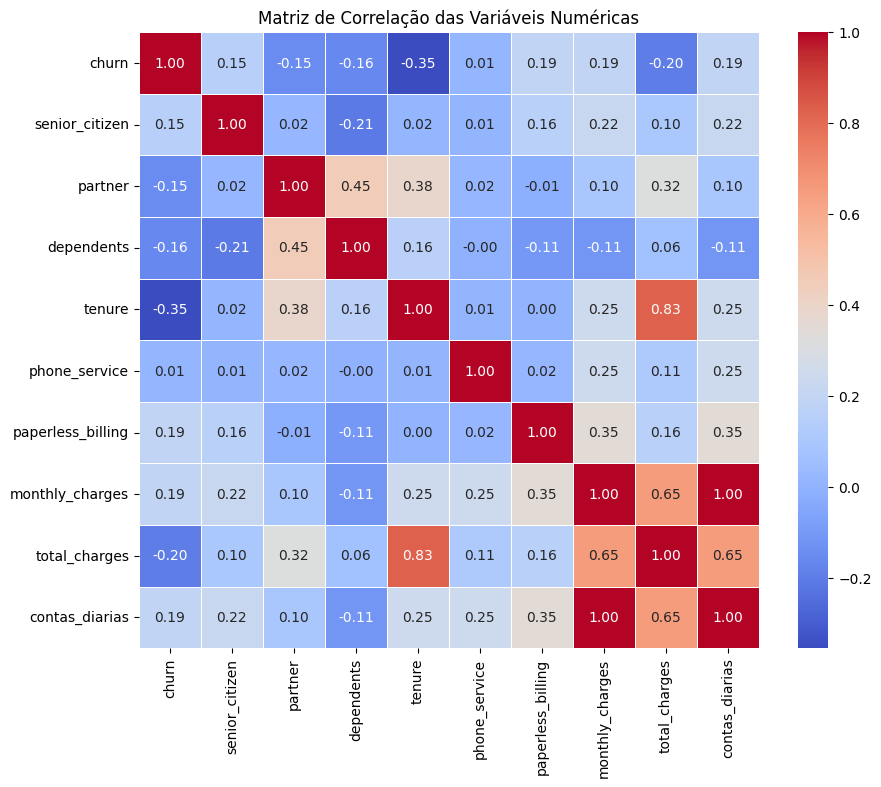

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as colunas numéricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

📊 Análise de Correlação com a Evasão (Churn)
Para identificar os fatores mais relacionados à evasão de clientes, realizamos uma análise de correlação entre as variáveis numéricas e a variável alvo churn.

🔹 Principais descobertas:

Correlação Negativa (menor chance de churn):

* `tenure` (r = -0.35): Clientes com mais tempo de contrato têm menor propensão à evasão.

* `total_charges` (r = -0.20): Quanto maior o total gasto, menor a chance de cancelamento.

* `partner e dependents` (ambas cerca de r = -0.15): Ter parceiro ou dependentes se associa a uma leve redução na evasão.

Correlação Positiva (maior chance de churn):

* `monthly_charge`s (r = 0.19): Clientes com faturas mensais mais altas tendem a sair com mais frequência.

* `paperless_billing` e `senior_citizen` (ambos r ≈ 0.15-0.19): Também apresentam leve associação com maior churn.

🔁 Multicolinearidade identificada:

* `monthly_charges` e `contas_diarias` apresentaram correlação perfeita (r = 1.00), indicando que uma é derivada da outra.

  ➡️ A variável `contas_diarias` foi removida do dataset.

✅ Com base nessa análise, priorizaremos variáveis com maior correlação com churn na modelagem preditiva e evitaremos redundâncias que possam comprometer a performance de alguns algoritmos.

In [117]:
dados_tratados = dados_tratados.drop(columns=['contas_diarias'])

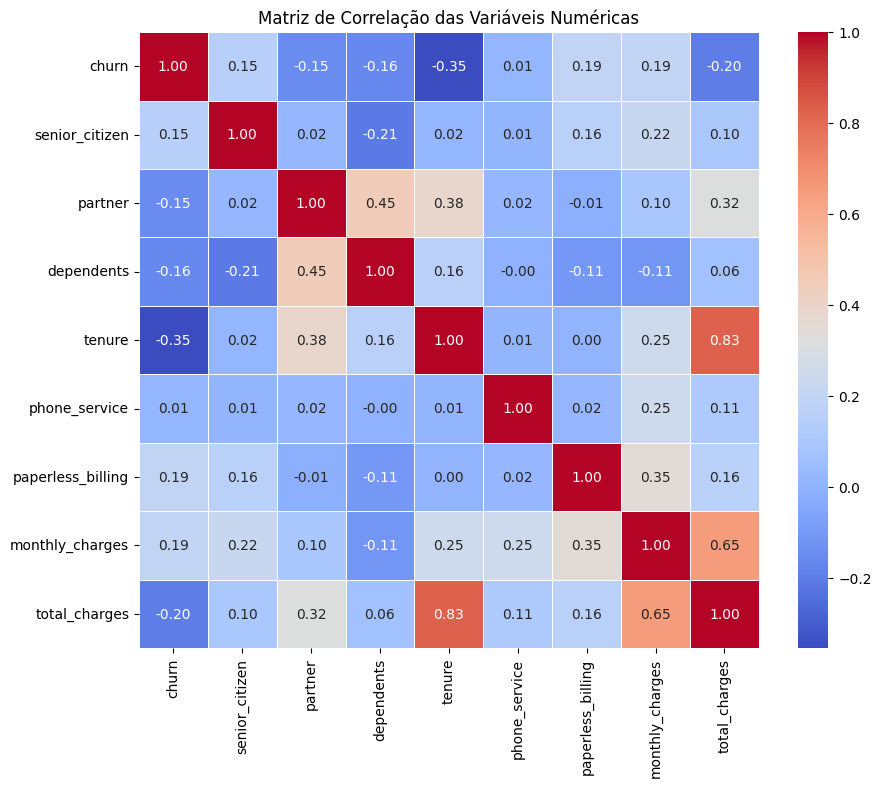

In [118]:
# Selecionando apenas as colunas numéricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Análises Direcionadas: Tempo de Contrato e Total Gasto vs Evasão

### Boxplot: Tempo de Contrato (Tenure) vs Evasão (Churn)

Visualizar a distribuição do tempo de contrato para clientes que permaneceram (0) e que saíram (1) para entender se o tempo de permanência influencia na evasão.

/tmp/ipython-input-121-82825298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=dados_tratados, palette='viridis')


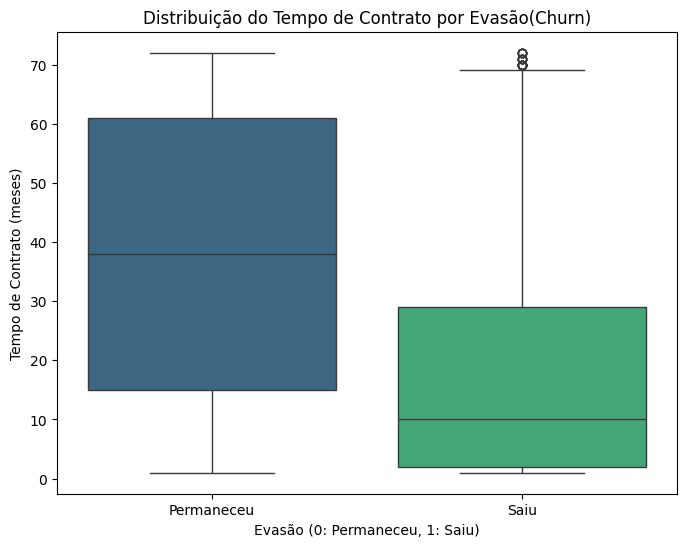

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=dados_tratados, palette='viridis')
plt.title('Distribuição do Tempo de Contrato por Evasão(Churn)')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Boxplot: Total Gasto (Total Charges) vs Evasão (Churn)

Visualizar a distribuição do total gasto por clientes que permaneceram (0) e que saíram (1) para entender se o valor total gasto influencia na evasão.

/tmp/ipython-input-122-1595302665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=dados_tratados, palette='viridis')


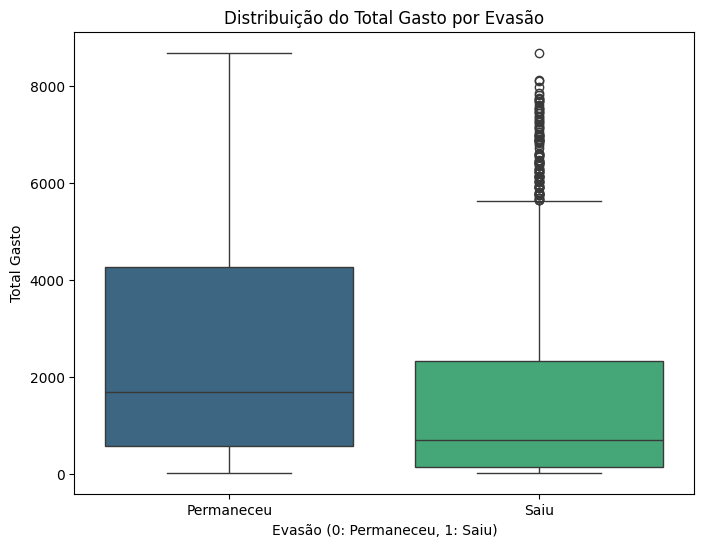

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total_charges', data=dados_tratados, palette='viridis')
plt.title('Distribuição do Total Gasto por Evasão')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Scatter Plot — Tempo de Contrato x Total Gasto com Churn
Aqui exploramos a relação entre duas variáveis juntas e como elas se comportam com churn:

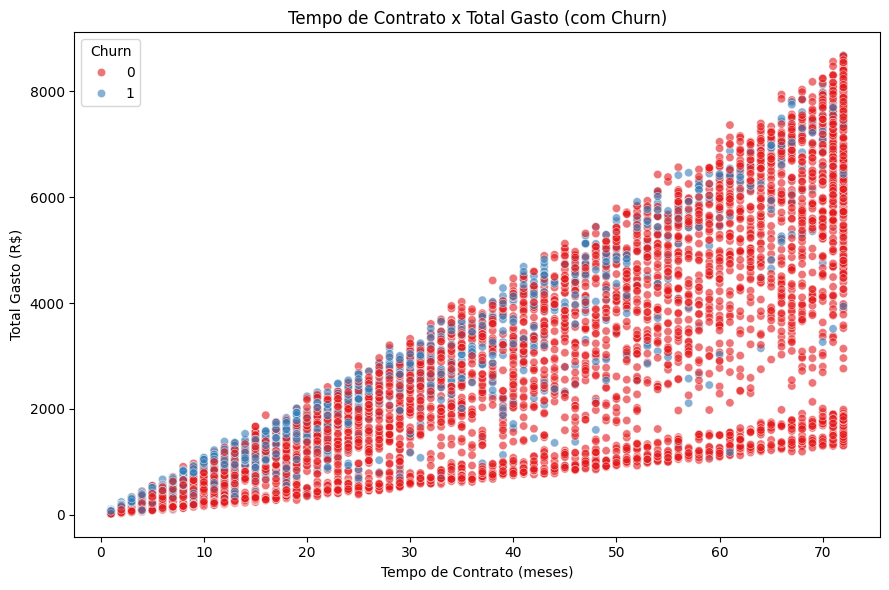

In [123]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=dados_tratados,
    x='tenure',
    y='total_charges',
    hue='churn',
    palette='Set1',
    alpha=0.6
)
plt.title('Tempo de Contrato x Total Gasto (com Churn)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Analisando o scatter plot de Tempo de Contrato `(tenure)` versus Total Gasto `(total_charges)` colorido pelo Churn, podemos tirar algumas conclusões importantes. Em resumo, o scatter plot visualmente reforça o que vimos na análise de correlação e nos boxplots:

* O Tempo de Contrato `(tenure)` e o Total Gasto (`total_charges)` são fortes indicadores de churn.
* Clientes de longo prazo e com alto gasto total são menos propensos a cancelar.
* Clientes novos ou com baixo tempo de contrato e baixo total gasto têm uma probabilidade maior de churn.

>Esta visualização é poderosa porque nos permite ver a interação dessas duas variáveis em relação ao churn, identificando clusters e tendências que podem não ser tão óbvias olhando apenas para correlações individuais.

## Commit das Alterações e Próximos Passos

As alterações realizadas nesta sessão (carregamento e tratamento dos dados, encoding, balanceamento de classes, treinamento e avaliação dos modelos LR, RF e KNN, análise de correlação e análises direcionadas) foram salvas e comitadas.

Continuaremos com os próximos cartões do desafio, incluindo a seleção de variáveis e outras análises, na próxima sessão de trabalho.